<a href="https://colab.research.google.com/github/sasansharifipour/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from scipy import stats
from statsmodels.stats import contingency_tables
from statsmodels.stats.api import SquareTable

In [160]:
data = pd.read_csv('dataset.csv')
meta = pd.read_csv('metadata.csv')

df = data.merge(meta, on=['user', 'task'], how='left')

In [161]:
df = df.loc[df['task'] == 6]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1486
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   user                              1487 non-null   object  
 1   task                              1487 non-null   object  
 2   BACKGROUND_Duration (in seconds)  1487 non-null   int64   
 3   BACKGROUND_Knowledge              1487 non-null   category
 4   BACKGROUND_Interest               1487 non-null   category
 5   BACKGROUND_Information            1487 non-null   category
 6   BACKGROUND_Opinion                1486 non-null   category
 7   BACKGROUND_Picture                1486 non-null   category
 8   REACTION_Duration (in seconds)    1482 non-null   float64 
 9   REACTION_Reading                  1479 non-null   category
 10  REACTION_Sharing                  1466 non-null   category
 11  REACTION_Accuracy                 1482 non-null   catego

In [103]:
df.head()

,user,task,BACKGROUND_Duration (in seconds),BACKGROUND_Knowledge,BACKGROUND_Interest,BACKGROUND_Information,BACKGROUND_Opinion,BACKGROUND_Picture,REACTION_Duration (in seconds),REACTION_Reading,REACTION_Sharing,REACTION_Accuracy,PERCEPTION_Duration (in seconds),PERCEPTION_Knowledge,PERCEPTION_Satisfaction,PERCEPTION_Information,PERCEPTION_Opinion,PERCEPTION_Picture,PERCEPTION_Validation,user_group,visited_pages,search_time_real
244,6,2,75,3,5,internet browsing,3.0,Emotional,50.0,Maybe,Yes,3.0,64.0,3.0,5.0,internet browsing,4.0,Factual,3.0,NaN,NaN,NaN
245,7,2,182,4,5,newspapers (online or on paper),3.0,Factual,48.0,No,No,1.0,34.0,3.0,4.0,newspapers (online or on paper),2.0,Factual,1.0,NaN,NaN,NaN
246,8,2,60,5,5,newspapers (online or on paper),3.0,Factual,55.0,Maybe,No,2.0,26.0,5.0,5.0,newspapers (online or on paper),3.0,Factual,1.0,NaN,NaN,NaN
247,10,2,44,3,3,internet browsing,3.0,Factual,96.0,Maybe,No,1.0,106.0,3.0,3.0,internet browsing,3.0,Factual,1.0,NaN,NaN,NaN
248,12,2,67,5,5,newspapers (online or on paper),3.0,Factual,116.0,No,No,1.0,23.0,5.0,5.0,newspapers (online or on paper),1.0,Factual,1.0,NaN,NaN,NaN


In [104]:
df.describe()

,user,task,BACKGROUND_Duration (in seconds),BACKGROUND_Knowledge,BACKGROUND_Interest,BACKGROUND_Opinion,REACTION_Duration (in seconds),REACTION_Accuracy,PERCEPTION_Duration (in seconds),PERCEPTION_Knowledge,PERCEPTION_Satisfaction,PERCEPTION_Opinion,PERCEPTION_Validation,visited_pages,search_time_real
count,252.000000,252.0,252.000000,252.000000,252.000000,252.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,20.000000,20.000000
mean,161.785714,2.0,1120.698413,3.103175,4.265873,2.797619,594.884462,1.844622,74.474104,3.099602,3.382470,2.808765,1.796813,3.600000,892.468450
std,98.066130,0.0,15941.332753,0.947459,0.955559,0.732508,7810.242404,0.532692,136.279310,1.001019,1.244641,0.786945,0.816425,5.393954,2479.112857
min,6.000000,2.0,18.000000,1.000000,1.000000,1.000000,9.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.330000
25%,75.750000,2.0,40.000000,2.000000,4.000000,2.000000,32.000000,2.000000,34.000000,2.000000,3.000000,2.000000,1.000000,1.750000,186.599000
50%,153.500000,2.0,53.500000,3.000000,5.000000,3.000000,65.000000,2.000000,48.000000,3.000000,4.000000,3.000000,2.000000,2.500000,306.399000
75%,234.250000,2.0,84.000000,4.000000,5.000000,3.000000,136.500000,2.000000,66.000000,4.000000,4.000000,3.000000,2.000000,3.000000,472.853000
max,366.000000,2.0,252923.000000,5.000000,5.000000,4.000000,123827.000000,4.000000,1077.000000,5.000000,5.000000,4.000000,4.000000,26.000000,11400.489000


In [162]:
df['user'] = df['user'].astype('str')
df['task'] = df['task'].astype('str')

df['BACKGROUND_Information'] = df['BACKGROUND_Information'].astype('category')
df['BACKGROUND_Knowledge'] = df['BACKGROUND_Knowledge'].astype('category')
df['BACKGROUND_Interest'] = df['BACKGROUND_Interest'].astype('category')
df['BACKGROUND_Opinion'] = df['BACKGROUND_Opinion'].astype('category')
df['BACKGROUND_Picture'] = df['BACKGROUND_Picture'].astype('category')
df['REACTION_Reading'] = df['REACTION_Reading'].astype('category')
df['REACTION_Sharing'] = df['REACTION_Sharing'].astype('category')
df['REACTION_Accuracy'] = df['REACTION_Accuracy'].astype('category')
df['PERCEPTION_Knowledge'] = df['PERCEPTION_Knowledge'].astype('category')
df['PERCEPTION_Satisfaction'] = df['PERCEPTION_Satisfaction'].astype('category')
df['PERCEPTION_Opinion'] = df['PERCEPTION_Opinion'].astype('category')
df['PERCEPTION_Validation'] = df['PERCEPTION_Validation'].astype('category')
df['PERCEPTION_Information'] = df['PERCEPTION_Information'].astype('category')
df['PERCEPTION_Picture'] = df['PERCEPTION_Picture'].astype('category')


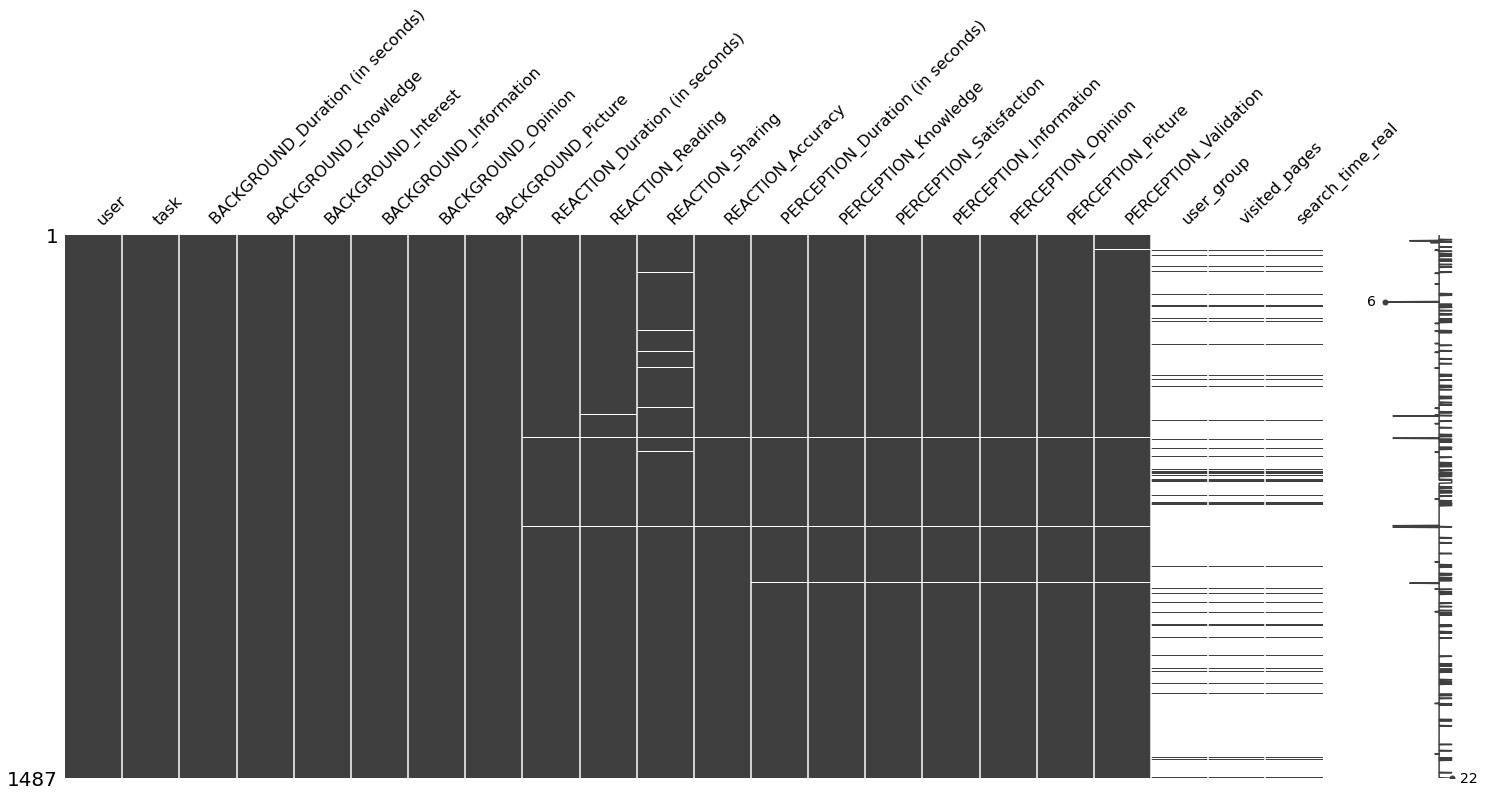

In [121]:
if df.isnull().any(axis=None):
    missingno.matrix(df)
    plt.show()

In [163]:
for col in df.select_dtypes(include='category').columns:
  df[col].fillna((df[col].mode()), inplace=True)

In [124]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [125]:
def categorical_eda(df):
    
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()

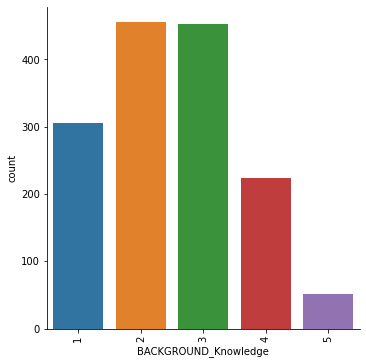

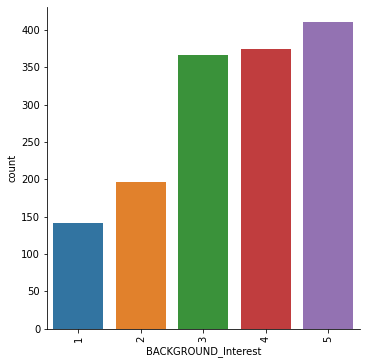

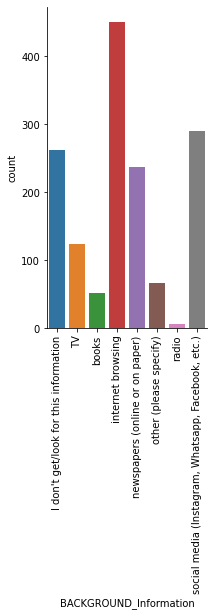

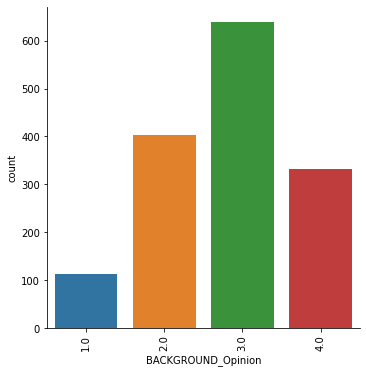

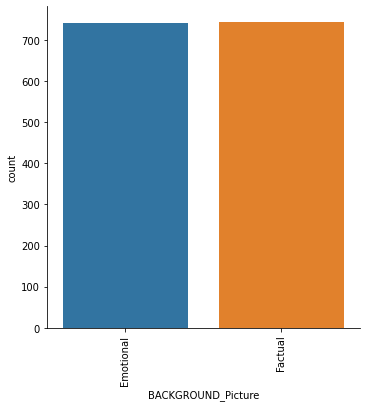

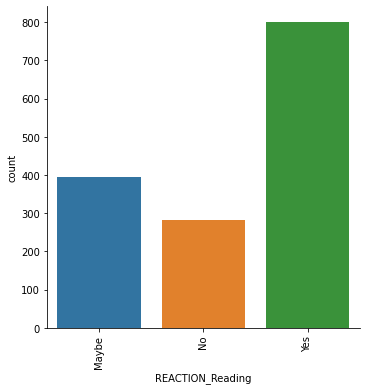

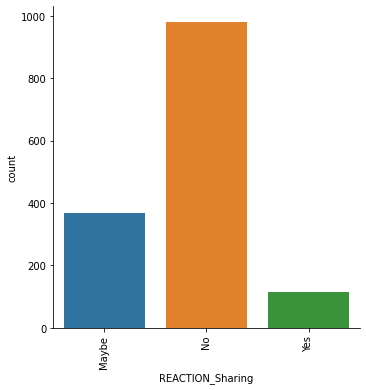

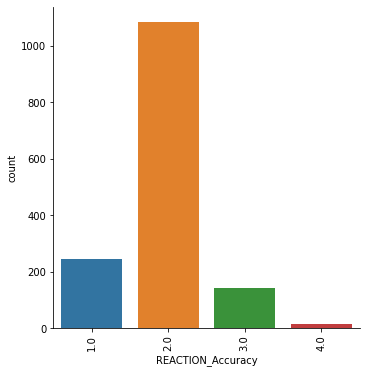

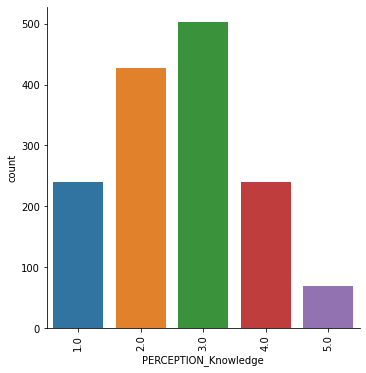

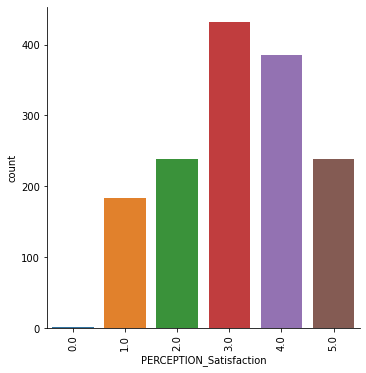

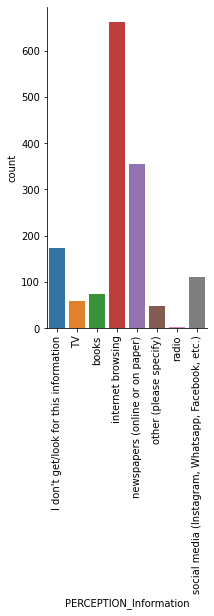

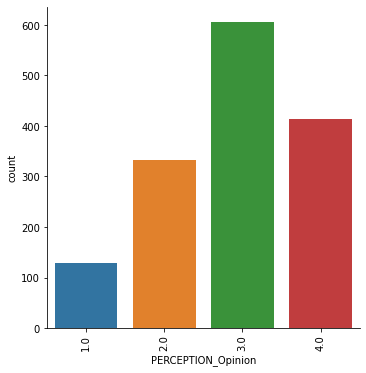

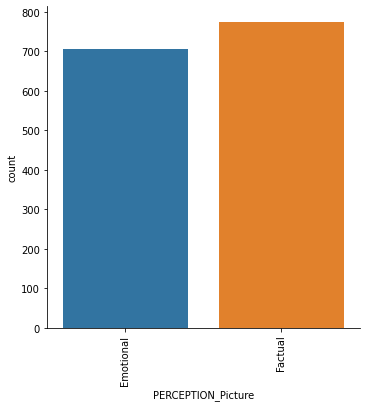

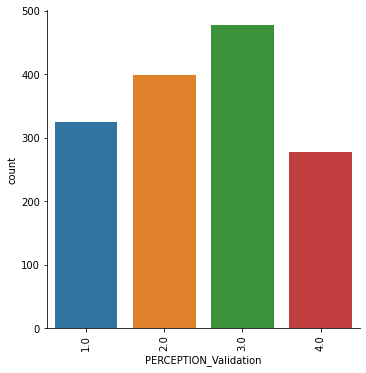

In [126]:
categorical_eda(df)

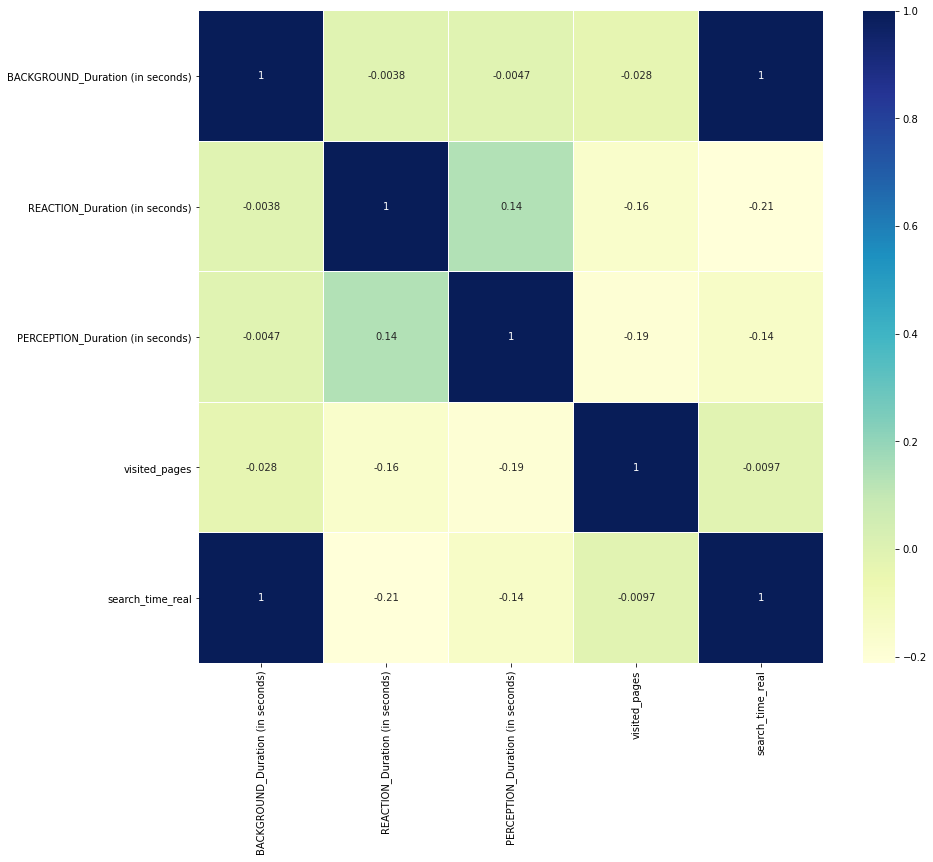

In [111]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [112]:
mycrosstab=pd.crosstab(df["BACKGROUND_Opinion"],df["PERCEPTION_Opinion"])
print(mycrosstab)
a = SquareTable(mycrosstab, shift_zeros=False).symmetry()
print(a)

PERCEPTION_Opinion  1.0  2.0  3.0  4.0
BACKGROUND_Opinion                    
1.0                   9    3    1    0
2.0                   6   29   23    0
3.0                   2   21  106   17
4.0                   0    2    8   24
df          6.0
pvalue      0.35301644358150047
statistic   6.664242424242424


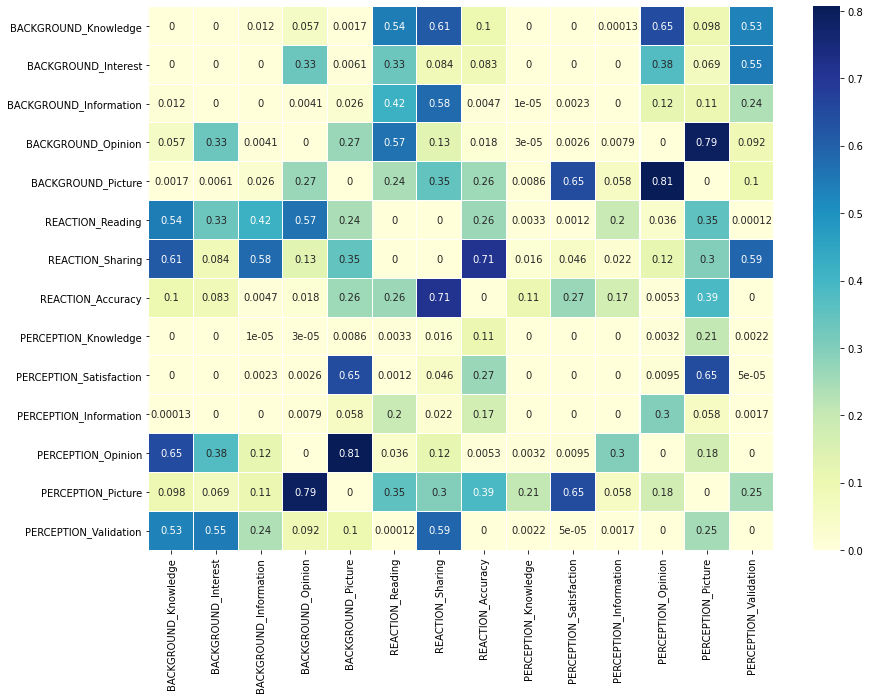

In [164]:
column_names = df.select_dtypes(include='category').columns
chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names, dtype=float)

outercnt=0
innercnt=0

for icol in column_names:
  for jcol in column_names:
    mycrosstab=pd.crosstab(df[icol],df[jcol])
    stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
    chisqmatrix.iloc[outercnt,innercnt]=round(p,5)
    innercnt=innercnt+1
  outercnt=outercnt+1
  innercnt=0

plt.figure(figsize=(14,10))
sns.heatmap(chisqmatrix, linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [51]:
chisqmatrix

,BACKGROUND_Knowledge,BACKGROUND_Interest,BACKGROUND_Information,BACKGROUND_Opinion,BACKGROUND_Picture,REACTION_Reading,REACTION_Sharing,REACTION_Accuracy,PERCEPTION_Knowledge,PERCEPTION_Satisfaction,PERCEPTION_Information,PERCEPTION_Opinion,PERCEPTION_Picture,PERCEPTION_Validation
BACKGROUND_Knowledge,0.00000,0.00000,0.00000,0.00017,0.35055,0.00024,0.00769,0.50873,0.00000,0.00000,0.00000,0.00727,0.50917,0.25807
BACKGROUND_Interest,0.00000,0.00000,0.00000,0.00000,0.00050,0.00000,0.00000,0.41023,0.00000,0.00000,0.00000,0.00000,0.04259,0.56368
BACKGROUND_Information,0.00000,0.00000,0.00000,0.00000,0.00859,0.00000,0.02175,0.05792,0.00000,0.00000,0.00000,0.00326,0.39336,0.00000
BACKGROUND_Opinion,0.00017,0.00000,0.00000,0.00000,0.01487,0.00000,0.00000,0.00000,0.00000,0.00174,0.00000,0.00000,0.17449,0.00000
BACKGROUND_Picture,0.35055,0.00050,0.00859,0.01487,0.00000,0.01414,0.00004,0.02069,0.02672,0.01364,0.11832,0.00241,0.00000,0.00000
REACTION_Reading,0.00024,0.00000,0.00000,0.00000,0.01414,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.04722,0.00000
REACTION_Sharing,0.00769,0.00000,0.02175,0.00000,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,0.01119,0.00000
REACTION_Accuracy,0.50873,0.41023,0.05792,0.00000,0.02069,0.00000,0.00000,0.00000,0.26487,0.28016,0.01070,0.00000,0.01396,0.00000
PERCEPTION_Knowledge,0.00000,0.00000,0.00000,0.00000,0.02672,0.00000,0.00000,0.26487,0.00000,0.00000,0.00000,0.00001,0.07908,0.37883
PERCEPTION_Satisfaction,0.00000,0.00000,0.00000,0.00174,0.01364,0.00000,0.00000,0.28016,0.00000,0.00000,0.00000,0.00000,0.03874,0.00000


In [128]:
def create_hist(first, second):
  plt.figure(figsize=(10,6))
  plt.hist(first, alpha=0.4)
  plt.hist(second, alpha=0.4)
  plt.legend([first.name, second.name])

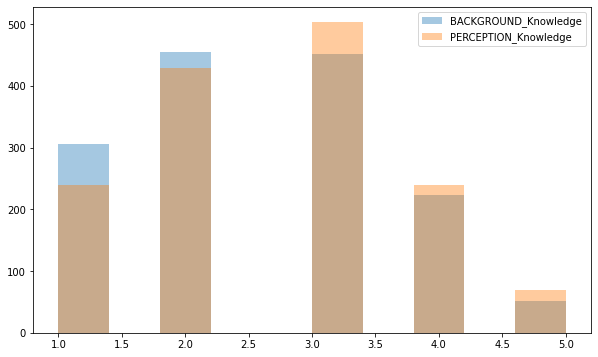

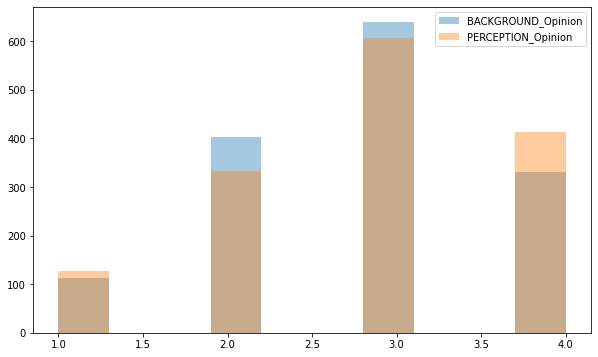

In [129]:
create_hist(df["BACKGROUND_Knowledge"], df["PERCEPTION_Knowledge"] )
create_hist(df["BACKGROUND_Opinion"], df["PERCEPTION_Opinion"] )